<a href="https://colab.research.google.com/github/julvasilenko/Online-store-sales-analytics/blob/main/Global_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project description
The dataset contains information about the sales of a company that operates in the global market and sells goods in regular stores and online stores. The dataset consists of three tables:

events.csv — sales over several years;

products.csv — product categories and their codes;

countries.csv — countries, regions, and their codes.

The main goal is to clean and analyze the data and find valuable insights into the company's activities.

#Data overview

In [1]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/GogColab

Mounted at /content/drive
/content/drive/MyDrive/GogColab


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#To create graphs, we will define a common style for them to make them look good.
my_style = {
    "figure.figsize": (10, 4),
    "axes.facecolor": "#f5f5f5",
    "axes.edgecolor": "#333333",
    "axes.grid": True,
    "grid.color": "#cccccc",
    "axes.prop_cycle": plt.cycler(color=[
        "#006400",  "#228B22",  "#32CD32",  "#00FF7F",
        "#3CB371",  "#2E8B57",  "#66CDAA",  "#8FBC8F" ])
}
plt.rcParams.update(my_style)

In [3]:
event_data = pd.read_csv("events.csv")
products_data = pd.read_csv("products.csv")
countries_data = pd.read_csv("countries.csv")

In [5]:
event_data.head(5)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


The `event_data` table contains data about orders, their delivery, contents, source of the order, and its cost.

In [6]:
products_data.head(5)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


The `products_data` table contains the product ID and its category.

In [7]:
countries_data.head(5)

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


The `countries_data` table contains information about the country name, its code, region, and subregion.

Key table fields:

`event_data` - `product_id`, `country_code`

`products_data` - `id`

`countries_data` - `alpha-3`

#Data cleaning

In [4]:
event_data.info()
products_data.info()
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
mem

Let's look at the tables for missing values and try to determine the approximate reasons why they are missing.

**Table `event_data`:**
- 1330 rows, 10 columns
- The `“Country Code”` column has 1248 rows - that's 82 missing values, a possible reason is that not all orders have a country specified
- The `“Units Sold”` column has 1328 rows - 2 missing values, most likely just a technical error where the quantity was not specified

**Table “products_data”:**
- 12 rows, 2 columns
- The product reference book has no gaps

**Table “countries_data”:**
- 249 rows, 5 columns
- Column `“alpha-2”` has 248 rows - 1 missing value, but it is incorrect because the country code for Namibia is NA
- Columns `region, sub-region` have 248 rows - 1 missing value, which is Antarctica, which has no region or sub-region


In [5]:
#First, let's figure out event_date.
event_data["Country Code"] = event_data["Country Code"].fillna("Unknown")
event_data["Units Sold"] = event_data["Units Sold"].fillna(event_data["Units Sold"].median())

#now countries_data
countries_data["alpha-2"] = countries_data["alpha-2"].astype(str)
#For Antarctica, fill in the “Unknown” cells.
countries_data["region"] = countries_data["region"].fillna("Unknown")
countries_data["sub-region"] = countries_data["sub-region"].fillna("Unknown")

In the `event_data` table, in the `“Country Code”` column, we replace the missing values with ‘Unknown’, since there are quite a few rows with such values, and it is not reasonable to delete them. In the `“Unit Sold”` column, we do not delete rows with missing values, but replace them with the median for further calculations.

In the `countries_data` table, for the `“alpha-2”` column, we simply change the value to a string so that the country code for Namibia is read as a string.
For the `“region”` and `“sub-region”` columns, we simply replace the missing values with “Unknown”.

In [6]:
#checking if everything is OK
event_data.info()
products_data.info()
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
mem

Let's move on to checking the correctly specified data types.

Table `event_data`:
- Column `“Order Date”` must be of type date.
- Column `“Ship Date”` must be of type date.
- Column `“Units Sold”` must be of type int according to logic.

Everything is fine in other tables.

Let's move on to conversion:

In [7]:
#Correcting dates
event_data["Order Date"] = pd.to_datetime(event_data["Order Date"], errors="coerce")
event_data["Ship Date"] = pd.to_datetime(event_data["Ship Date"], errors="coerce")
#I am adding the parameter errors="coerce" to prevent errors and bad values.

event_data["Units Sold"] = event_data["Units Sold"].astype(int)

In [8]:
#Checking
event_data.info()
products_data.info()
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   int64         
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   i

Let's start working on duplicates.

First, let's convert all text data to a single register to reduce the likelihood of missing duplicates.

After that, let's delete duplicates if they exist and perform a check.

In [9]:
#Let's start with the event_date table.
for column in event_data.select_dtypes(include="object"):
    event_data[column] = event_data[column].str.strip().str.lower()
#This is a cycle that runs through the text columns of the table and brings the text to a uniform appearance.
print("Number of duplicates in the table:", event_data.duplicated().sum())
#After manipulating the text, we determine how many duplicates we have in the table.

Number of duplicates in the table: 0


No duplicates found in this table, moving on to the next one

In [10]:
#Duplicates of the products_data table
for column in products_data.select_dtypes(include="object"):
    products_data[column] = products_data[column].str.strip().str.lower()

print("Number of duplicates in the table:", event_data.duplicated().sum())

Number of duplicates in the table: 0


Тут теж без дублікатів рухаємось далі

In [11]:
#Duplicates of the countries_data table
for column in countries_data.select_dtypes(include="object"):
    countries_data[column] = countries_data[column].str.strip().str.lower()


print("Number of duplicates in the table:", countries_data.duplicated().sum())

Number of duplicates in the table: 0


There are no duplicates, so let's continue working with the dataset.

As a final step, let's check the data for anomalies using the `“.describe()”` method.

It only makes sense to check the data for anomalies in the `event_data` table.

Therefore, let's check the columns `“Units Sold”, “Unit Price”, “Unit Cost”` for data adequacy.

In [12]:
print(event_data[["Units Sold", "Unit Price", "Unit Cost"]].describe())

        Units Sold   Unit Price    Unit Cost
count  1330.000000  1330.000000  1330.000000
mean   4952.216541   264.893541   187.246812
std    2903.012194   217.323460   176.158873
min       2.000000     9.330000     6.920000
25%    2360.750000    81.730000    35.840000
50%    4962.000000   154.060000    97.440000
75%    7458.750000   437.200000   263.330000
max    9999.000000   668.270000   524.960000


What we have:
- adequate minimum and maximum values for “Units Sold” — no orders with 0 items or too many items
- average = 4952 and median = 4962 — the data is symmetrical, with no significant deviations
- in the `“Unit Price”` column, the mean = 264.89 and the median = 154.06 - the price is skewed towards more expensive items, but this is normal for a diverse range of products with different price categories
- no anomalies were found in the `“Unit Cost”` column either.

The data is ready to use.

#Data analysis and visualization.

First, let's combine all tables into a single data frame, remove unnecessary columns, and rename some if necessary.

In [13]:
#We join the event_data and products_data tables. The key is Product ID.
sales_data = event_data.merge(products_data, left_on="Product ID", right_on="id", how="left")
#Add countries. Key - Country Code
sales_data = sales_data.merge(countries_data, left_on="Country Code", right_on="alpha-3", how="left")

#Let's delete unnecessary columns—repeated stacks that served as keys (we simply don't need alpha-3).
sales_data = sales_data.drop(columns=["id", "alpha-2", "alpha-3"])

#For convenience, I renamed the column with country names.
sales_data = sales_data.rename(columns={"name": "Country"})

#Let's check how our table looks now
print(sales_data.head())
print("\n---------------------")
print(sales_data.info())

    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              m          nor        2103   
1  100983083 2016-08-11 2016-08-11              c          srb        2103   
2  101025998 2014-07-18 2014-08-11              m      unknown        7940   
3  102230632 2017-05-13 2017-06-13              l          mne        2455   
4  103435266 2012-08-11 2012-09-18              h          srb        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  item_type     Country  \
0        online         650      205.70     117.11     cereal      norway   
1       offline        1993      205.70     117.11     cereal      serbia   
2        online        4693      668.27     502.54  household         NaN   
3        online        1171      109.28      35.84    clothes  montenegro   
4       offline        7648       47.45      31.79  beverages      serbia   

   region       sub-region  
0  europe  northern europe  
1  europe 

Let's calculate the company's key metrics

In [14]:
total_order = sales_data["Order ID"].nunique() #Let's count the number of unique IDs.
total_unit = sales_data["Units Sold"].sum() #sum up the number of items in orders
total_country = sales_data["Country"].nunique() #count the number of unique countries
total_category = sales_data["item_type"].nunique() #count the number of unique categories
total_revenue = (sales_data["Units Sold"] * sales_data["Unit Price"]).sum() #We calculate revenue as “units sold” * “price per unit.”
total_cost = (sales_data["Units Sold"] * sales_data["Unit Cost"]).sum() #We calculate expenses as “units sold” * “cost price.”
total_profit = total_revenue - total_cost #we calculate profit as income minus expenses
avg_order = total_revenue / total_order #Let's define the average order as revenue divided by the number of orders.

print(f"Quantity of orders: {total_order}")
print(f"Quantity sold: {total_unit}")
print(f"Amount of countries covered: {total_country}")
print(f"Quantity of product categories: {total_category}")
print(f"Total revenue: {total_revenue}")
print(f"Total costs: {total_cost}")
print(f"Total profit: {total_profit}")
print(f"Average order value: {avg_order}")

Quantity of orders: 1330
Quantity sold: 6586448
Amount of countries covered: 45
Quantity of product categories: 12
Total revenue: 1704628370.65
Total costs: 1202785737.5299997
Total profit: 501842633.12000036
Average order value: 1281675.4666541354


In [15]:
#For convenience of further analysis, let's add columns with income, expenses, and profit to the data frame.
#Let's calculate using the example of the previous cell with the code
sales_data["Revenue"] = sales_data["Units Sold"] * sales_data["Unit Price"]
sales_data["Cost"] = sales_data["Units Sold"] * sales_data["Unit Cost"]
sales_data["Profit"] = sales_data["Revenue"] - sales_data["Cost"]

In [16]:
#Check if the columns have been added.
sales_data.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,Country,region,sub-region,Revenue,Cost,Profit
0,100640618,2014-10-08,2014-10-18,m,nor,2103,online,650,205.70,117.11,cereal,norway,europe,northern europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,c,srb,2103,offline,1993,205.70,117.11,cereal,serbia,europe,southern europe,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,m,unknown,7940,online,4693,668.27,502.54,household,NaN,NaN,NaN,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,l,mne,2455,online,1171,109.28,35.84,clothes,montenegro,europe,southern europe,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,h,srb,1270,offline,7648,47.45,31.79,beverages,serbia,europe,southern europe,362897.60,243129.92,119767.68


Sales by category


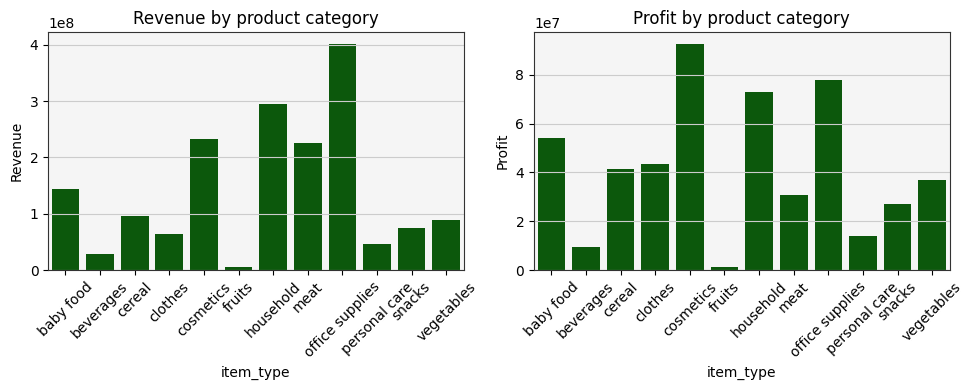

Sales by country


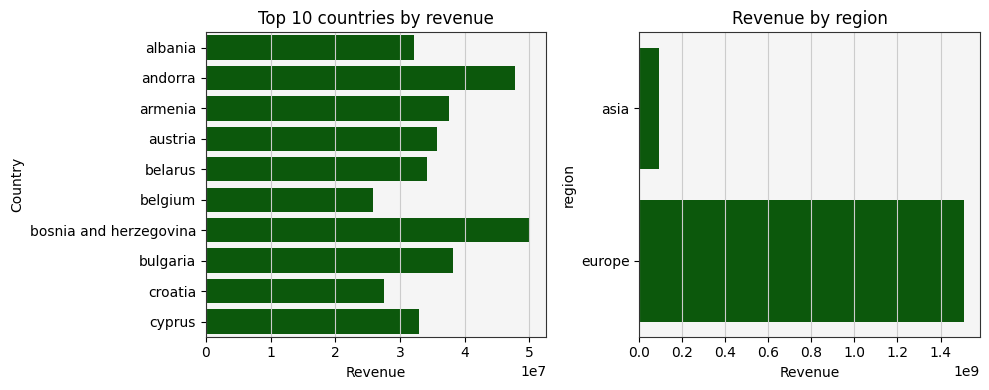

Sales by sales channels


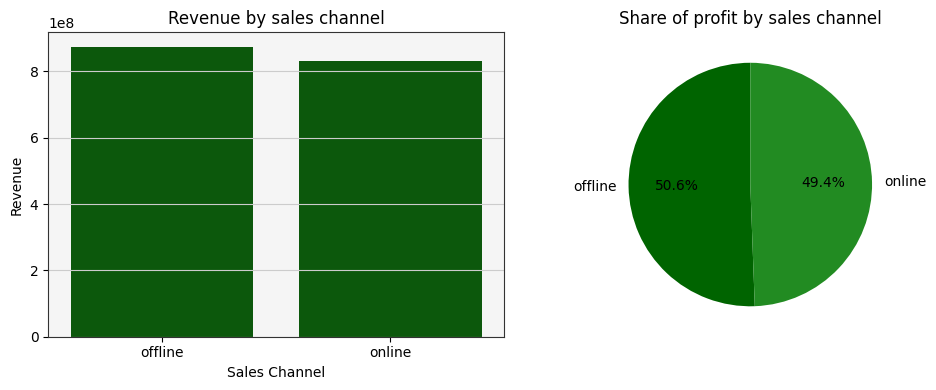

In [17]:
#Sales analysis (revenue, expenses, profits, product popularity) by segment
#product categories
#geography (countries, regions),
#sales channels (online or offline).

#Sales by category
print("Sales by category")
category_stats = sales_data.groupby("item_type")[["Revenue", "Cost", "Profit", "Units Sold"]].sum()

fig1, ax1 = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(x=category_stats.index, y=category_stats["Revenue"], ax=ax1[0])
ax1[0].set_title("Revenue by product category")
ax1[0].tick_params(axis='x', rotation=45)

sns.barplot(x=category_stats.index, y=category_stats["Profit"], ax=ax1[1])
ax1[1].set_title("Profit by product category")
ax1[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Sales by country
print("Sales by country")
country_stats = sales_data.groupby("Country")[["Revenue", "Profit"]].sum().head(10)
region_stats = sales_data.groupby("region")[["Revenue", "Profit"]].sum()

fig2, ax2 = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(y=country_stats.index, x=country_stats["Revenue"], ax=ax2[0])
ax2[0].set_title("Top 10 countries by revenue")

sns.barplot(y=region_stats.index, x=region_stats["Revenue"], ax=ax2[1])
ax2[1].set_title("Revenue by region")

plt.tight_layout()
plt.show()

#Sales by sales channels
print("Sales by sales channels")
channel_stats = sales_data.groupby("Sales Channel")[["Revenue", "Profit"]].sum()

fig3, ax3 = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(x=channel_stats.index, y=channel_stats["Revenue"], ax=ax3[0])
ax3[0].set_title("Revenue by sales channel")

ax3[1].pie(channel_stats["Profit"], labels=channel_stats.index, autopct="%1.1f%%", startangle=90)
ax3[1].set_title("Share of profit by sales channel")

plt.tight_layout()
plt.show()


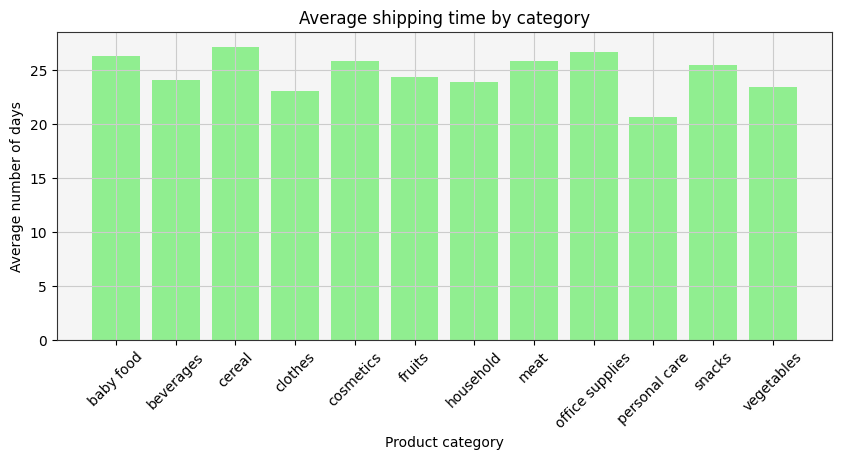

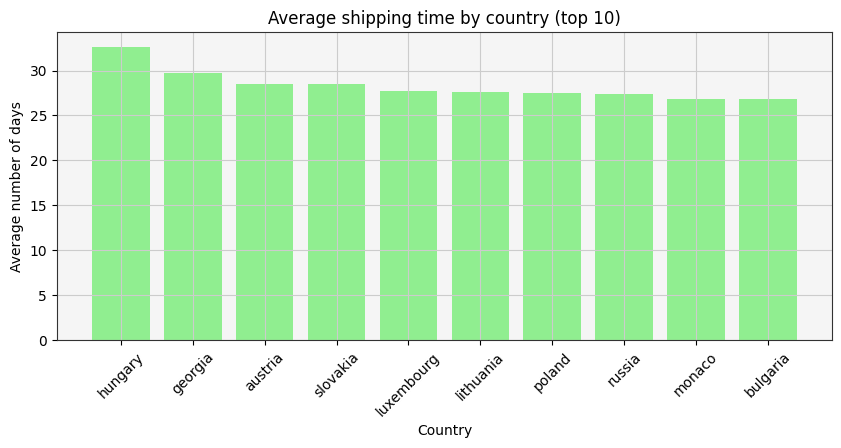

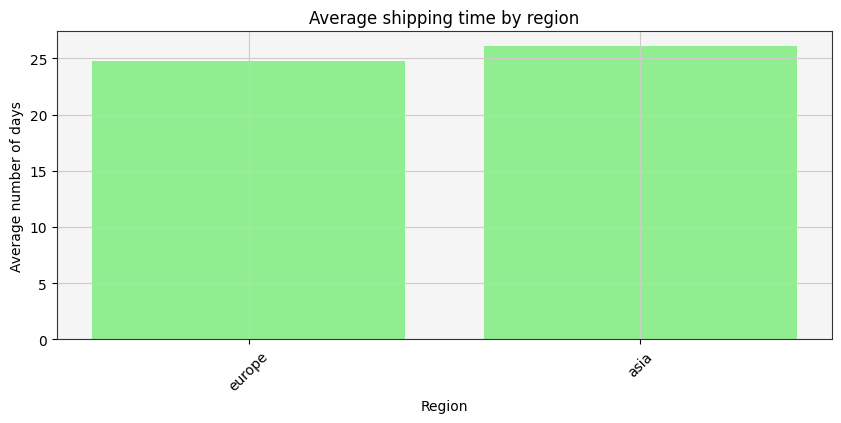

In [18]:
#Analysis of the time interval between order placement and shipment by:
#product categories
#countries
#regions
#calculate this interval in days
sales_data["Shipping Days"] = (sales_data["Ship Date"] - sales_data["Order Date"]).dt.days

#Interval by category
mean_interval_category = (sales_data.groupby("item_type")["Shipping Days"].mean())

plt.bar(mean_interval_category.index, mean_interval_category.values, color = "lightgreen")
plt.title("Average shipping time by category")
plt.ylabel("Average number of days")
plt.xlabel("Product category")
plt.xticks(rotation=45)
plt.show()

#Interval by country
mean_interval_country = (sales_data.groupby("Country")["Shipping Days"].mean().sort_values(ascending=False).head(10))

plt.bar(mean_interval_country.index, mean_interval_country.values, color = "lightgreen")
plt.title("Average shipping time by country (top 10)")
plt.ylabel("Average number of days")
plt.xlabel("Сountry")
plt.xticks(rotation=45)
plt.show()

#Interval by region
mean_interval_regoin = (sales_data.groupby("region")["Shipping Days"].mean().sort_values())

plt.bar(mean_interval_regoin.index, mean_interval_regoin.values, color = "lightgreen")
plt.title("Average shipping time by region")
plt.ylabel("Average number of days")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

#Here, before visualization, I use an auxiliary variable to which I transfer grouped data—this makes it easier to
#write code and prevents it from breaking when Nan values are encountered.

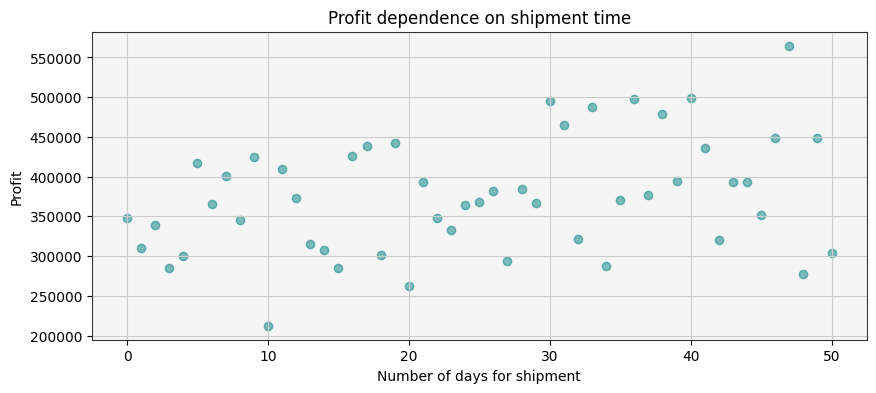

In [19]:
#Analyze whether profit depends on the time required to ship goods. Perform the necessary aggregation and visualization.
#To identify the dependency, I will build a scatter plot—it nicely reflects the correlation between variables.
profit_for_interval = sales_data.groupby("Shipping Days")["Profit"].mean()

plt.scatter(profit_for_interval.index, profit_for_interval.values,  alpha=0.5,  color="teal")
plt.title("Profit dependence on shipment time")
plt.xlabel("Number of days for shipment")
plt.ylabel("Profit")
plt.show()

We can see that there is no clear correlation between these two values.

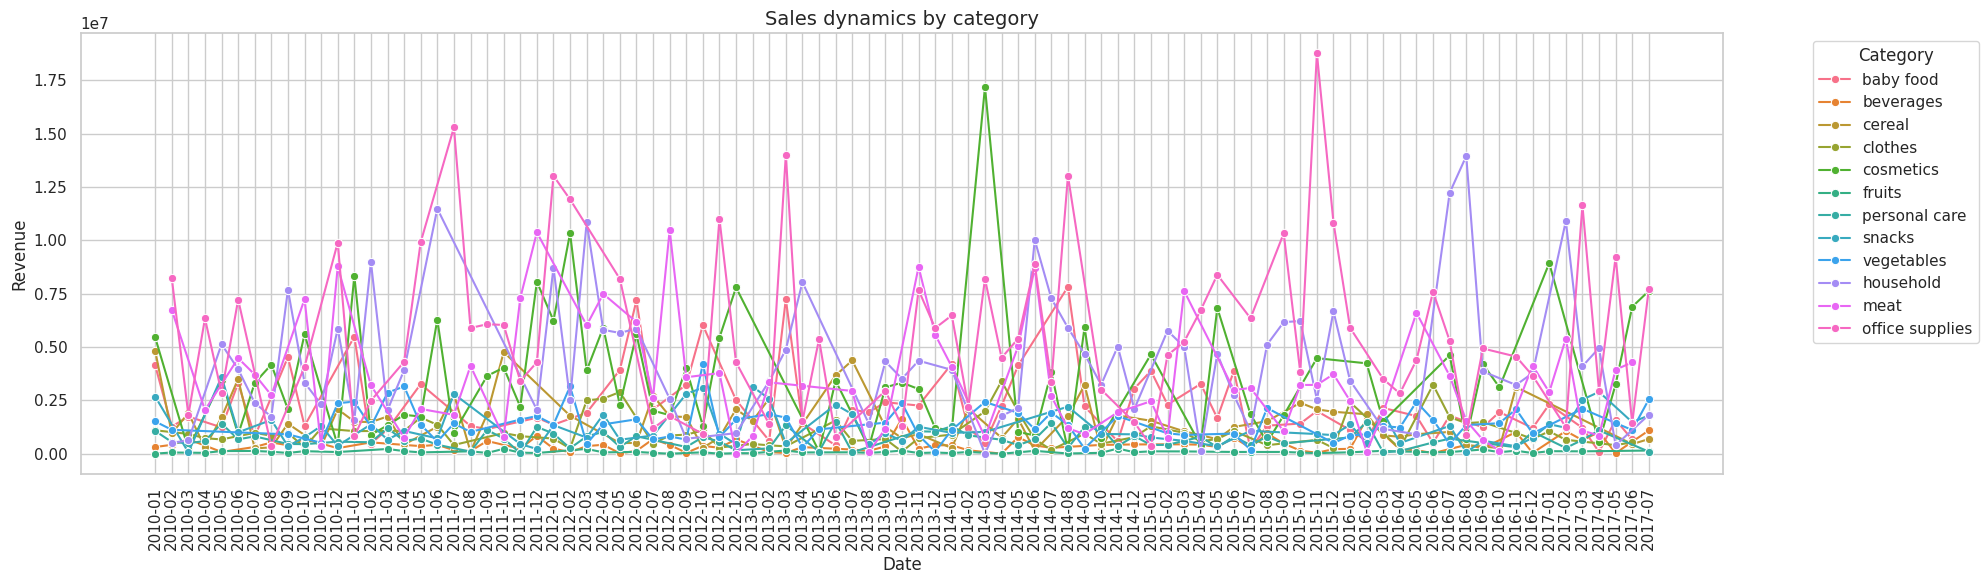

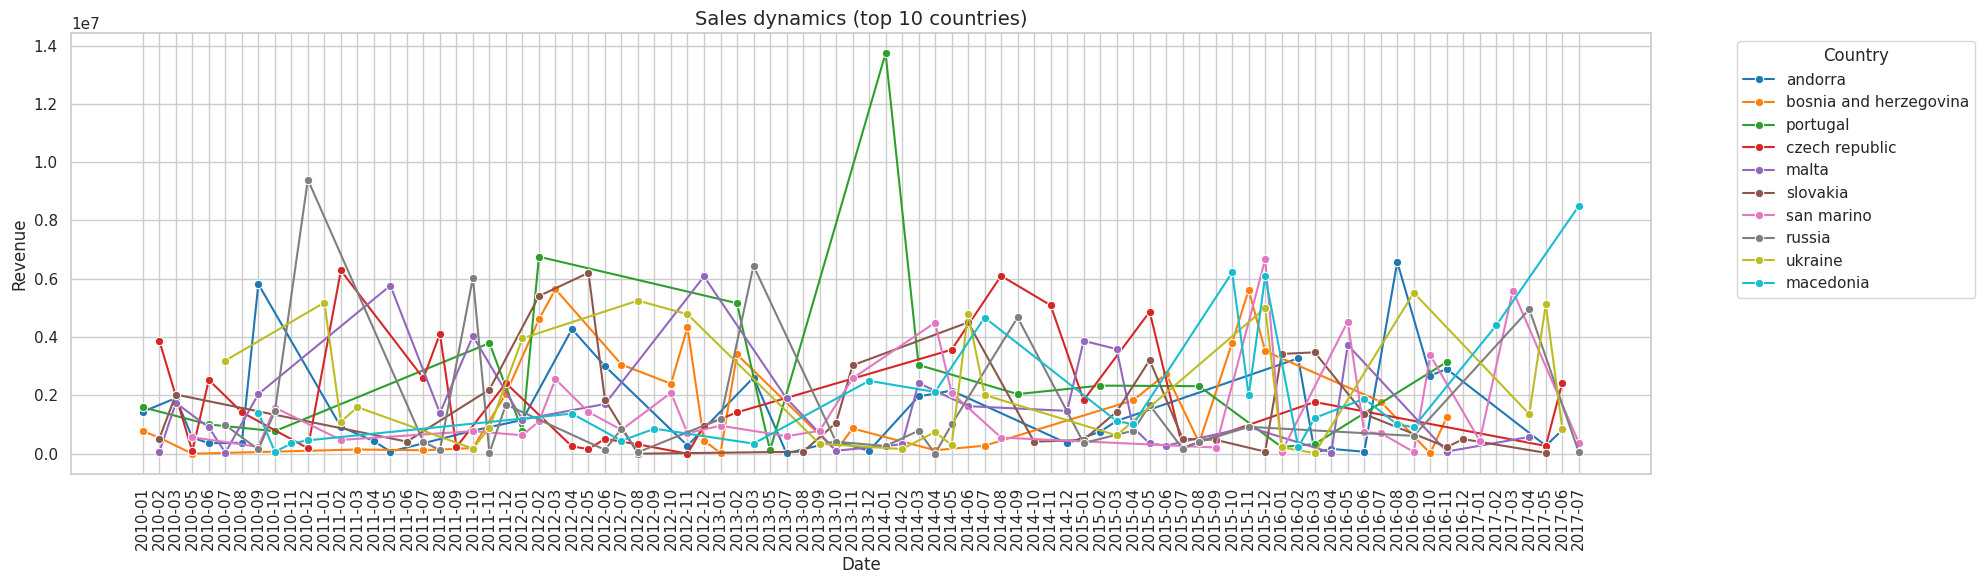

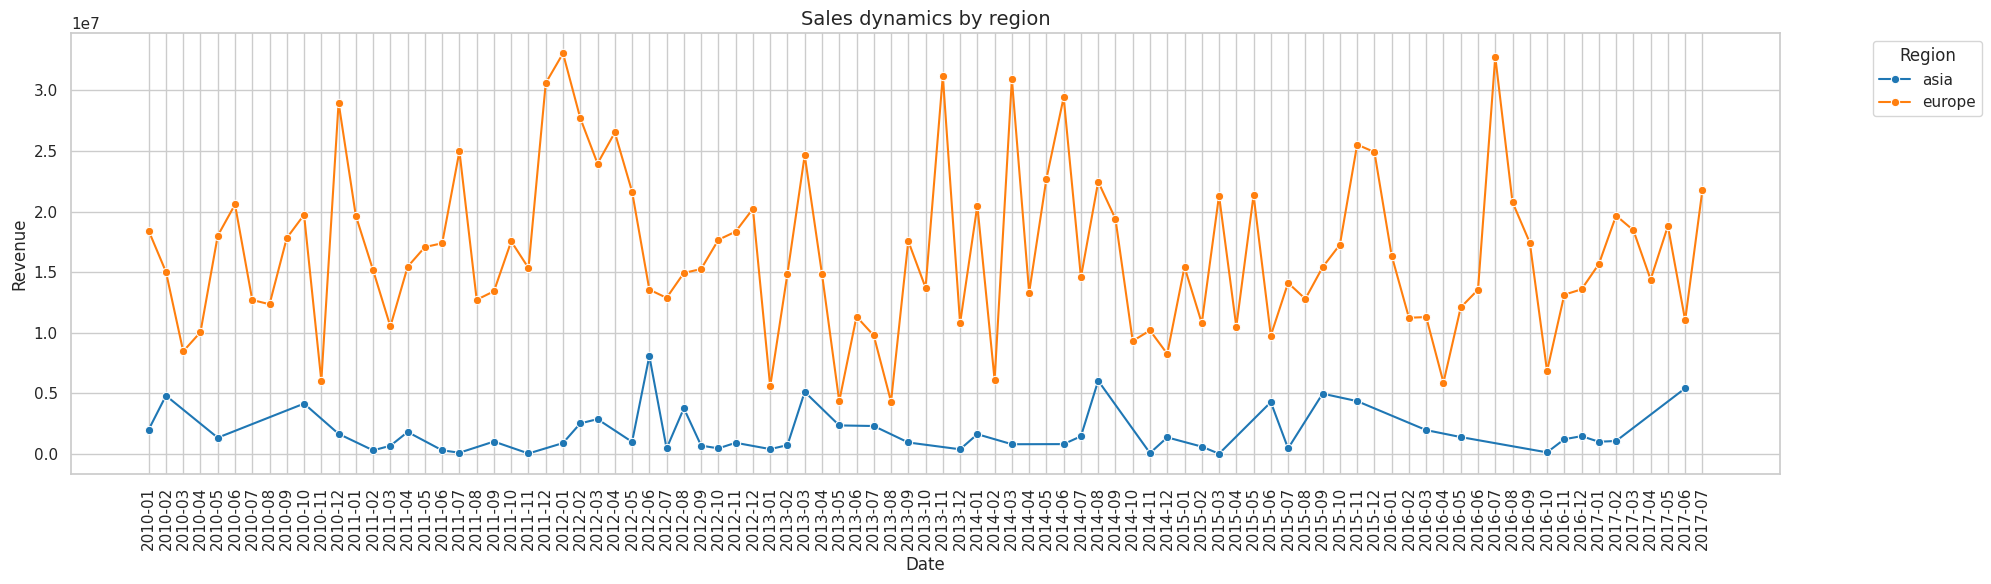

In [38]:
#Analyze sales dynamics (over time) by product category, country, and region using visualization tools to identify key trends.
#For convenience, add a separate column with the year and month.
sales_data["YearMonth"] = sales_data["Order Date"].dt.to_period("M").astype(str)

sns.set(style="whitegrid", palette="tab10")

#dynamics by category
dynamic_for_category = (
    sales_data.groupby(["YearMonth", "item_type"])["Revenue"].sum().reset_index()
)

plt.figure(figsize=(20, 6))
sns.lineplot(data=dynamic_for_category, x="YearMonth", y="Revenue", hue="item_type", marker="o")
plt.title("Sales dynamics by category", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.legend(title="Сategory", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#dynamics by country
dynamic_for_country = (
    sales_data.groupby(["YearMonth", "Country"])["Revenue"].sum().reset_index()
)
top_countries = (
    sales_data.groupby("Country")["Revenue"].sum().nlargest(10).index
)
country_trend_top = dynamic_for_country[dynamic_for_country["Country"].isin(top_countries)]

plt.figure(figsize=(20, 6))
sns.lineplot(data=country_trend_top, x="YearMonth", y="Revenue", hue="Country", marker="o")
plt.title("Sales dynamics (top 10 countries)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#dynamics by region
dynamic_for_region = (
    sales_data.groupby(["YearMonth", "region"])["Revenue"].sum().reset_index()
)

plt.figure(figsize=(20, 6))
sns.lineplot(data=dynamic_for_region, x="YearMonth", y="Revenue", hue="region", marker="o")
plt.title("Sales dynamics by region", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The two most profitable categories to pay attention to are Cosmetics and Office Supplies.

It is also worth focusing on Portugal, as it generates the most revenue.

Overall, Europe is our main source of profit, so we should focus most of our efforts on that region.

In [ ]:
#Analysis of sales by day of the week.
#Add a column with the day of the week.
sales_data["DayOfWeek"] = sales_data["Order Date"].dt.day_name()

#group sales and index by days of the week
sales_by_weekday = sales_data.groupby("DayOfWeek")["Revenue"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10,6))
plt.bar(sales_by_weekday.index, sales_by_weekday.values, color="lightgreen")
plt.title("Total sales by day of the week")
plt.ylabel("Revenue")
plt.xlabel("Day of week")
plt.xticks(rotation=45)
plt.show()

#now let's look at categories
#we also group and index
category_by_weekday = (sales_data.groupby(["DayOfWeek", "item_type"])["Revenue"].sum().unstack()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
)

#create a bar chart with a separate column for each day of the week
category_by_weekday.plot(kind="bar",figsize=(12,6))

plt.title("Sales by day of the week by category")
plt.ylabel("Revenue")
plt.xlabel("Day of week")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Conclusions:**


---



**Data quality and structure**

The data does not contain anomalies or extreme values: the number of units sold, prices, and cost price are within the expected range.

The distribution of the number of units sold is symmetrical (mean ≈ median), which indicates that the data is balanced without any skewness.

There is a noticeable shift toward more expensive goods in the price indicators, which is natural.


---


**General business indicators**

Number of orders: 1,328

Total number of units sold: 6.58 million

45 countries covered in 12 product categories

Revenue: 1.70 billion

Expenses: 1.20 billion

Profit: 0.50 billion

Average order value: ≈ 1.28 million

Sales by product category

The most profitable categories are Cosmetics and Office Supplies.

Household and Fruits also show high revenue levels.

Beverages and Snacks have the lowest figures, which may be a signal to review the pricing or marketing strategy.

The profitability of goods does not always correlate directly with revenue — some categories generate more profit through price rather than sales volume.



---


**Geographical analysis**

The majority of profits come from Europe, so companies should focus their efforts there.

Portugal is a key country in terms of revenue.

The top 10 countries in terms of revenue also include Andorra, Bulgaria, Belgium, and Austria, indicating a stable presence in the European market.



---


**Sales by channel**

Revenue is evenly distributed across sales channels, indicating their effectiveness.

The share of profit by channel shows a balanced structure — no channel is overly unprofitable or dominant.



---


**Logistics and shipping speed**

The average shipping time by category ranges from 20 to 27 days, which is an acceptable indicator.

Personal Care and Household products are delivered the fastest, while Cereal and Office Supplies take the longest.

By country, the longest shipping times are observed in Hungary (≈32 days), while in most countries they are around 27–28 days.

By region, shipping times are relatively stable, with no significant deviations.

**Dependence of profit on shipping time**

The graph does not show a clear relationship between profit and number of delivery days — therefore, shipping speed is not a determining factor in profitability.

---



**Next steps:**

Focus marketing efforts on the European market, especially Portugal.

Strengthen the product range and promotions in the Cosmetics and Office Supplies categories, which have the highest profits.

Improve logistics in countries with longer delivery times (e.g., Hungary).

Analyze low-profit categories (Beverages, Snacks) — it may be worth reducing their share or replacing them with products in higher demand.